# Data Preparation

In [1]:
from matplotlib.colors import  LinearSegmentedColormap
from skimage.transform import resize, rescale

from skimage import filters
import matplotlib.pyplot as plt 
import utils_prepr as ut
from random import randint
from scipy import ndimage as nd
from skimage import transform
import tensorflow as tf
import pandas as pd
from scipy import ndimage
from skimage import filters
import nibabel as nib
import numpy as np
import scipy
import os 

import matplotlib.gridspec as gridspec
import random


def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

tran = 0.8
colorsM = [(0, 0, 0, 0), (1,  0.30196078,  0., tran), (1  ,  0.39,  0.39, tran)]  # (R,G,B,T)
cmap_name = 'my_list'
cmc = LinearSegmentedColormap.from_list(cmap_name, colorsM, N=3)


cmap = LinearSegmentedColormap.from_list('custom blue', 
                                             [(0,    '#ffff00'),
                                              (0.25, '#002266'),
                                              (1,    '#002266')], N=3)

In [2]:
# functions and parameters for data loading
input_shape = (128, 128, 128, 1)
x_dim = input_shape[0] 
y_dim = input_shape[1]
z_dim = input_shape[2]
output_classes = 2

def norm_label(y):
    label = np.copy(y)
    for i in range(len(np.unique(label))):
        label[label == np.unique(label)[i]] = i
    return label

def prepare_y(y):
    y = norm_label(y)
    if output_classes == 2:
        y[y>0] = 1
    return to_categorical(y, output_classes)

def load_file(path_array):
        while True:
            try:
                data_3D = get_data(path_array)
                volume = np.array(data_3D)
                print(volume.shape)
                break
            except:
                continue
        return volume
    
    
def get_data(path_list):
    array_temp = []
    for j in range(len(path_list)):
        img_temp = np.array(nib.load(path_list[j]).dataobj)
        array_temp.append(img_temp)
    return np.array(array_temp)

def get_wmls_path_list(dataset_dir):
    image_path_array1, image_path_array2, mask_path_array = [], [], []
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            file_path = subdir + '/' + file # change to '\\' if using Windows
            if file_path.endswith("03_wmh.nii"):
                mask_path_array.append(file_path)
            elif file_path.endswith("03_FLAIR.nii"): # change to '\\' if using Windows
                image_path_array1.append(file_path)
            elif file_path.endswith("03_T1.nii"): # change to '\\' if using Windows
                image_path_array2.append(file_path)   
    return np.array([np.array(image_path_array1),np.array(image_path_array2),np.array(mask_path_array)])

# Calculation of the mean mask

### MS15

In [119]:

def get_wmls_path_list(dataset_dir):
    mask1, mask2 = [], []
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            file_path = subdir + '/' + file # change to '\\' if using Windows
            if file_path.endswith("mask1.nii"):
                mask1.append(file_path)
            elif file_path.endswith("mask2.nii"): # change to '\\' if using Windows
                mask2.append(file_path) 
    return np.array([np.array(mask1),np.array(mask2)])

In [120]:
dataset_dir = '/Users/elena/Documents/data/train/MS15'
path_array = get_wmls_path_list(dataset_dir)

In [121]:
path_array.shape

(2, 21)

In [137]:
stri = path_array[1,3].split('/')[-1:][0]

stri

'training03_02_mask2.nii'

In [138]:
head, tail = os.path.split(path_array[1,3])
head

'/Users/elena/Documents/data/train/MS15/test/0302/masks'

[0 1]
[0.  0.5 1. ]


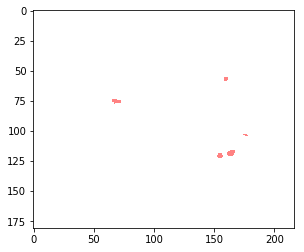

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


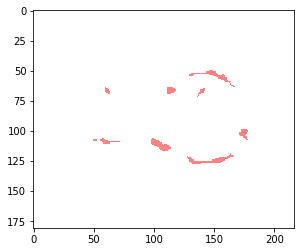

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


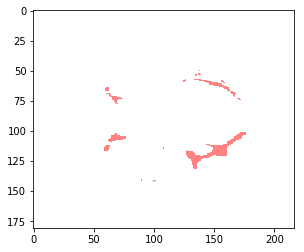

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


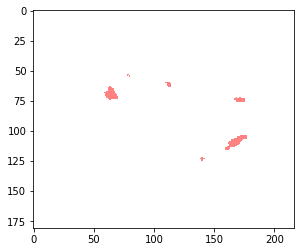

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


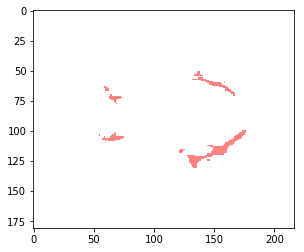

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


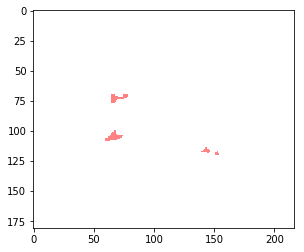

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


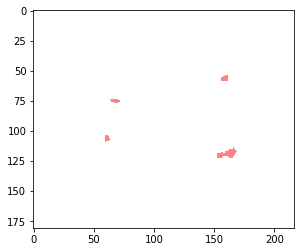

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


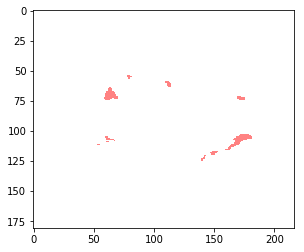

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


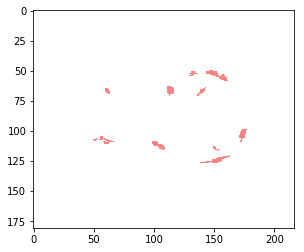

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


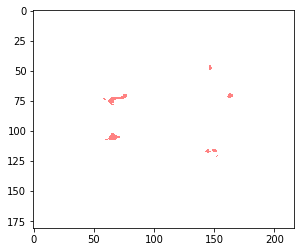

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


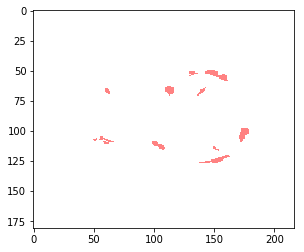

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


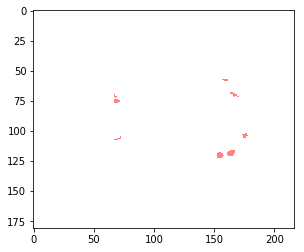

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


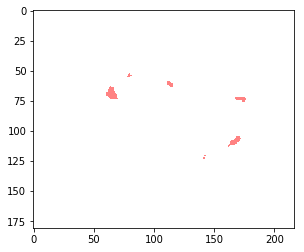

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


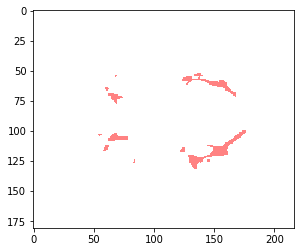

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


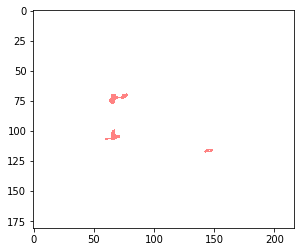

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


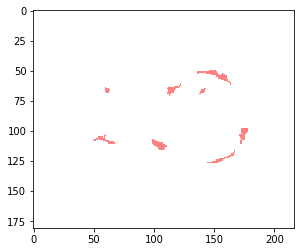

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


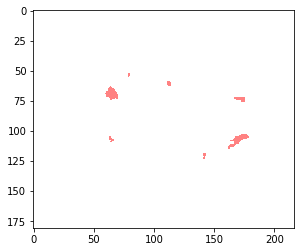

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


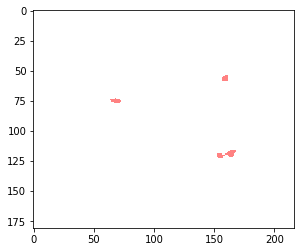

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


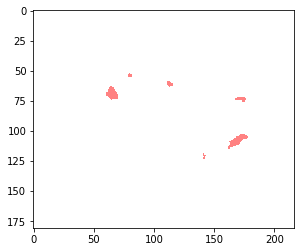

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


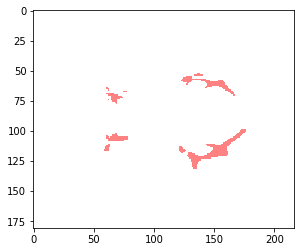

output shape (181, 217, 181)
[0 1]
[0.  0.5 1. ]


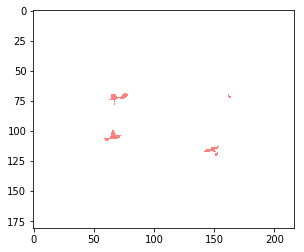

output shape (181, 217, 181)


In [122]:
#dataset_dir = '/Users/elena/Documents/data/MS16/TrainingDataset_MSSEG'


#%% inference and plots

for kk in np.arange(0, path_array.shape[1]):
    # Load the data 
    path = path_array[1,kk].split('/')[-1:][0]
    fname = path[8:]
    fname = fname[:5]
    head, tail = os.path.split(path_array[1,kk])
    mask1 = nib.load(path_array[0,kk])
    mask1_arr = np.array(mask1.dataobj) 
    mask2 = nib.load(path_array[1,kk])
    mask2_ar = np.array(mask2.dataobj) 
    print(np.unique(mask2_ar))
    
    final_mask = (mask2_ar + mask1_arr)/2
    print(np.unique(final_mask))
    th = 0.5
    final_mask[final_mask>=th] = 1
    final_mask[final_mask<th] = 0
    plt.imshow(final_mask[:,:,85], cmc)
    plt.show()
     # save results to .nii.gz
    output = np.squeeze(final_mask)
    output = data = np.uint16(np.round(output))
    print('output shape {}'.format(output.shape))
    ni_img = nib.Nifti1Image(output, mask2.affine)
    nib.save(ni_img, os.path.join(head,'{}_wmh.nii.gz'.format( fname ) ))


# Calculating Distance

In [3]:

def get_wmls_path_list(dataset_dir):
    t1, mask = [], []
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            file_path = subdir + '/' + file # change to '\\' if using Windows
            if file_path.endswith("wmh.nii.gz"): # change to '\\' if using Windows
                mask.append(file_path) 
            elif file_path.endswith("T1.nii.gz"): # change to '\\' if using Windows
                t1.append(file_path) 
    return np.array([np.array(mask), np.array(t1)])

In [6]:
dataset_dir = '/Users/elena/Documents/data/train'
path_array = get_wmls_path_list(dataset_dir)

In [7]:
path_array.shape

(2, 105)

In [8]:
path, wml_vol, t1w_vol, wml_perc = [], [], [], []
for kk in np.arange(0, path_array.shape[1]):
    print("Volume:", kk)
    head, tail = os.path.split(path_array[0,kk])
    path.append(head)
    # Load the data
    lab = nib.load(path_array[0,kk])
    label_ar = np.array(lab.dataobj) 
    t1 = nib.load(path_array[1,kk])
    t1_ar = np.array(t1.dataobj) 
    # Sum the voxels segmentation map volume
    lab_vol = np.sum(lab.get_data() > 0) 
    print(lab_vol)
    wml_vol.append(lab_vol)
    # Sum the voxels T1 volume
    t1_vol = np.sum(t1.get_data() > 0)
    print(t1_vol)
    t1w_vol.append(t1_vol)
    # Calculate the WMH volume percentage from the brain volume
    perc = lab_vol/t1_vol*100
    print(perc)
    wml_perc.append(perc)
    
path = np.array(path)
wml_vol = np.array(wml_vol)
t1w_vol = np.array(t1w_vol) 
wml_perc = np.array(wml_perc)

Volume: 0


/Users/elena/miniconda3/envs/aicuram/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # Remove the CWD from sys.path while we load stuff.
/Users/elena/miniconda3/envs/aicuram/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  del sys.path[0]


21353
1532367
1.393465142488712
Volume: 1
3555
1580191
0.2249728039205387
Volume: 2
7639
1575283
0.48492873978834283
Volume: 3
37222
1359589
2.7377391255739782
Volume: 4
5455
1371084
0.39786037908691224
Volume: 5
54760
6730739
0.8135807969971796
Volume: 6
4664
6015559
0.07753227921129191
Volume: 7
14217
7504955
0.18943484671127275
Volume: 8
110399
6298858
1.7526827878958378
Volume: 9
70294
7086349
0.9919635626187759
Volume: 10
7696
6301037
0.12213862575318953
Volume: 11
1880
7348263
0.025584277536065327
Volume: 12
96818
6509113
1.487422326206351
Volume: 13
284194
7805848
3.640783166671962
Volume: 14
58392
7565025
0.7718679052613838
Volume: 15
9105
6770900
0.13447252211670532
Volume: 16
178908
7281564
2.4569996226085493
Volume: 17
96427
6603505
1.4602396757479552
Volume: 18
285871
5917496
4.830945386359366
Volume: 19
47630
5981245
0.7963225047628044
Volume: 20
35304
7334378
0.4813496113780883
Volume: 21
202632
7587779
2.670504768259592
Volume: 22
3732
6520285
0.05723676189000941
Volume:

In [9]:
df = pd.DataFrame([path, wml_vol, t1w_vol, wml_perc])

In [10]:
df = df.T
df.columns = ['path_id', 'wml_vol', 't1_vol', 'wml_perc']

In [12]:
MEAN = df['wml_perc'].mean()
print(MEAN)

1.483011922708886


In [13]:
SD = df['wml_perc'].std()
print(SD)

1.4099332640062099


Using the formula provided by Dr Maria del C. Valdés Hernández, I calculated the distance from the mean

In [14]:
df['dist'] = ((MEAN - df['wml_perc'])**2/SD**2).astype(float)
df['dist'] 

0      0.004034
1      0.796143
2      0.501114
3      0.791957
4      0.592357
         ...   
100    0.982538
101    0.571270
102    0.798333
103    0.545113
104    0.022142
Name: dist, Length: 105, dtype: float64

/Users/elena/miniconda3/envs/aicuram/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


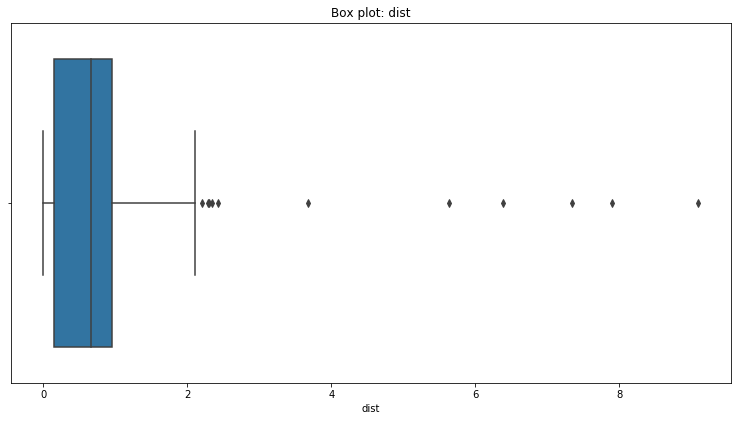

In [15]:
import seaborn as sns

ax = sns.boxplot(x=df["dist"]) 

ax.set(xlabel='dist')
set_size(10,5)
plt.title(r'Box plot: dist')

plt.show()

In [16]:
df['dist'].describe()


count    105.000000
mean       0.990476
std        1.570184
min        0.000010
25%        0.147164
50%        0.667397
75%        0.957089
max        9.097131
Name: dist, dtype: float64

In [17]:
df.to_csv('wml_dist.csv', index=False)